In [1]:
import stim
import pymatching
import numpy as np
import sinter
from typing import List
import matplotlib.pyplot as plt

In [2]:
from src.utils.qccd_arch import *

ModuleNotFoundError: No module named 'src'

In [3]:
import sys
import os
# Add the parent directory to the Python path
sys.path.append(os.path.abspath('..'))

In [4]:
from src.utils.qccd_arch import *

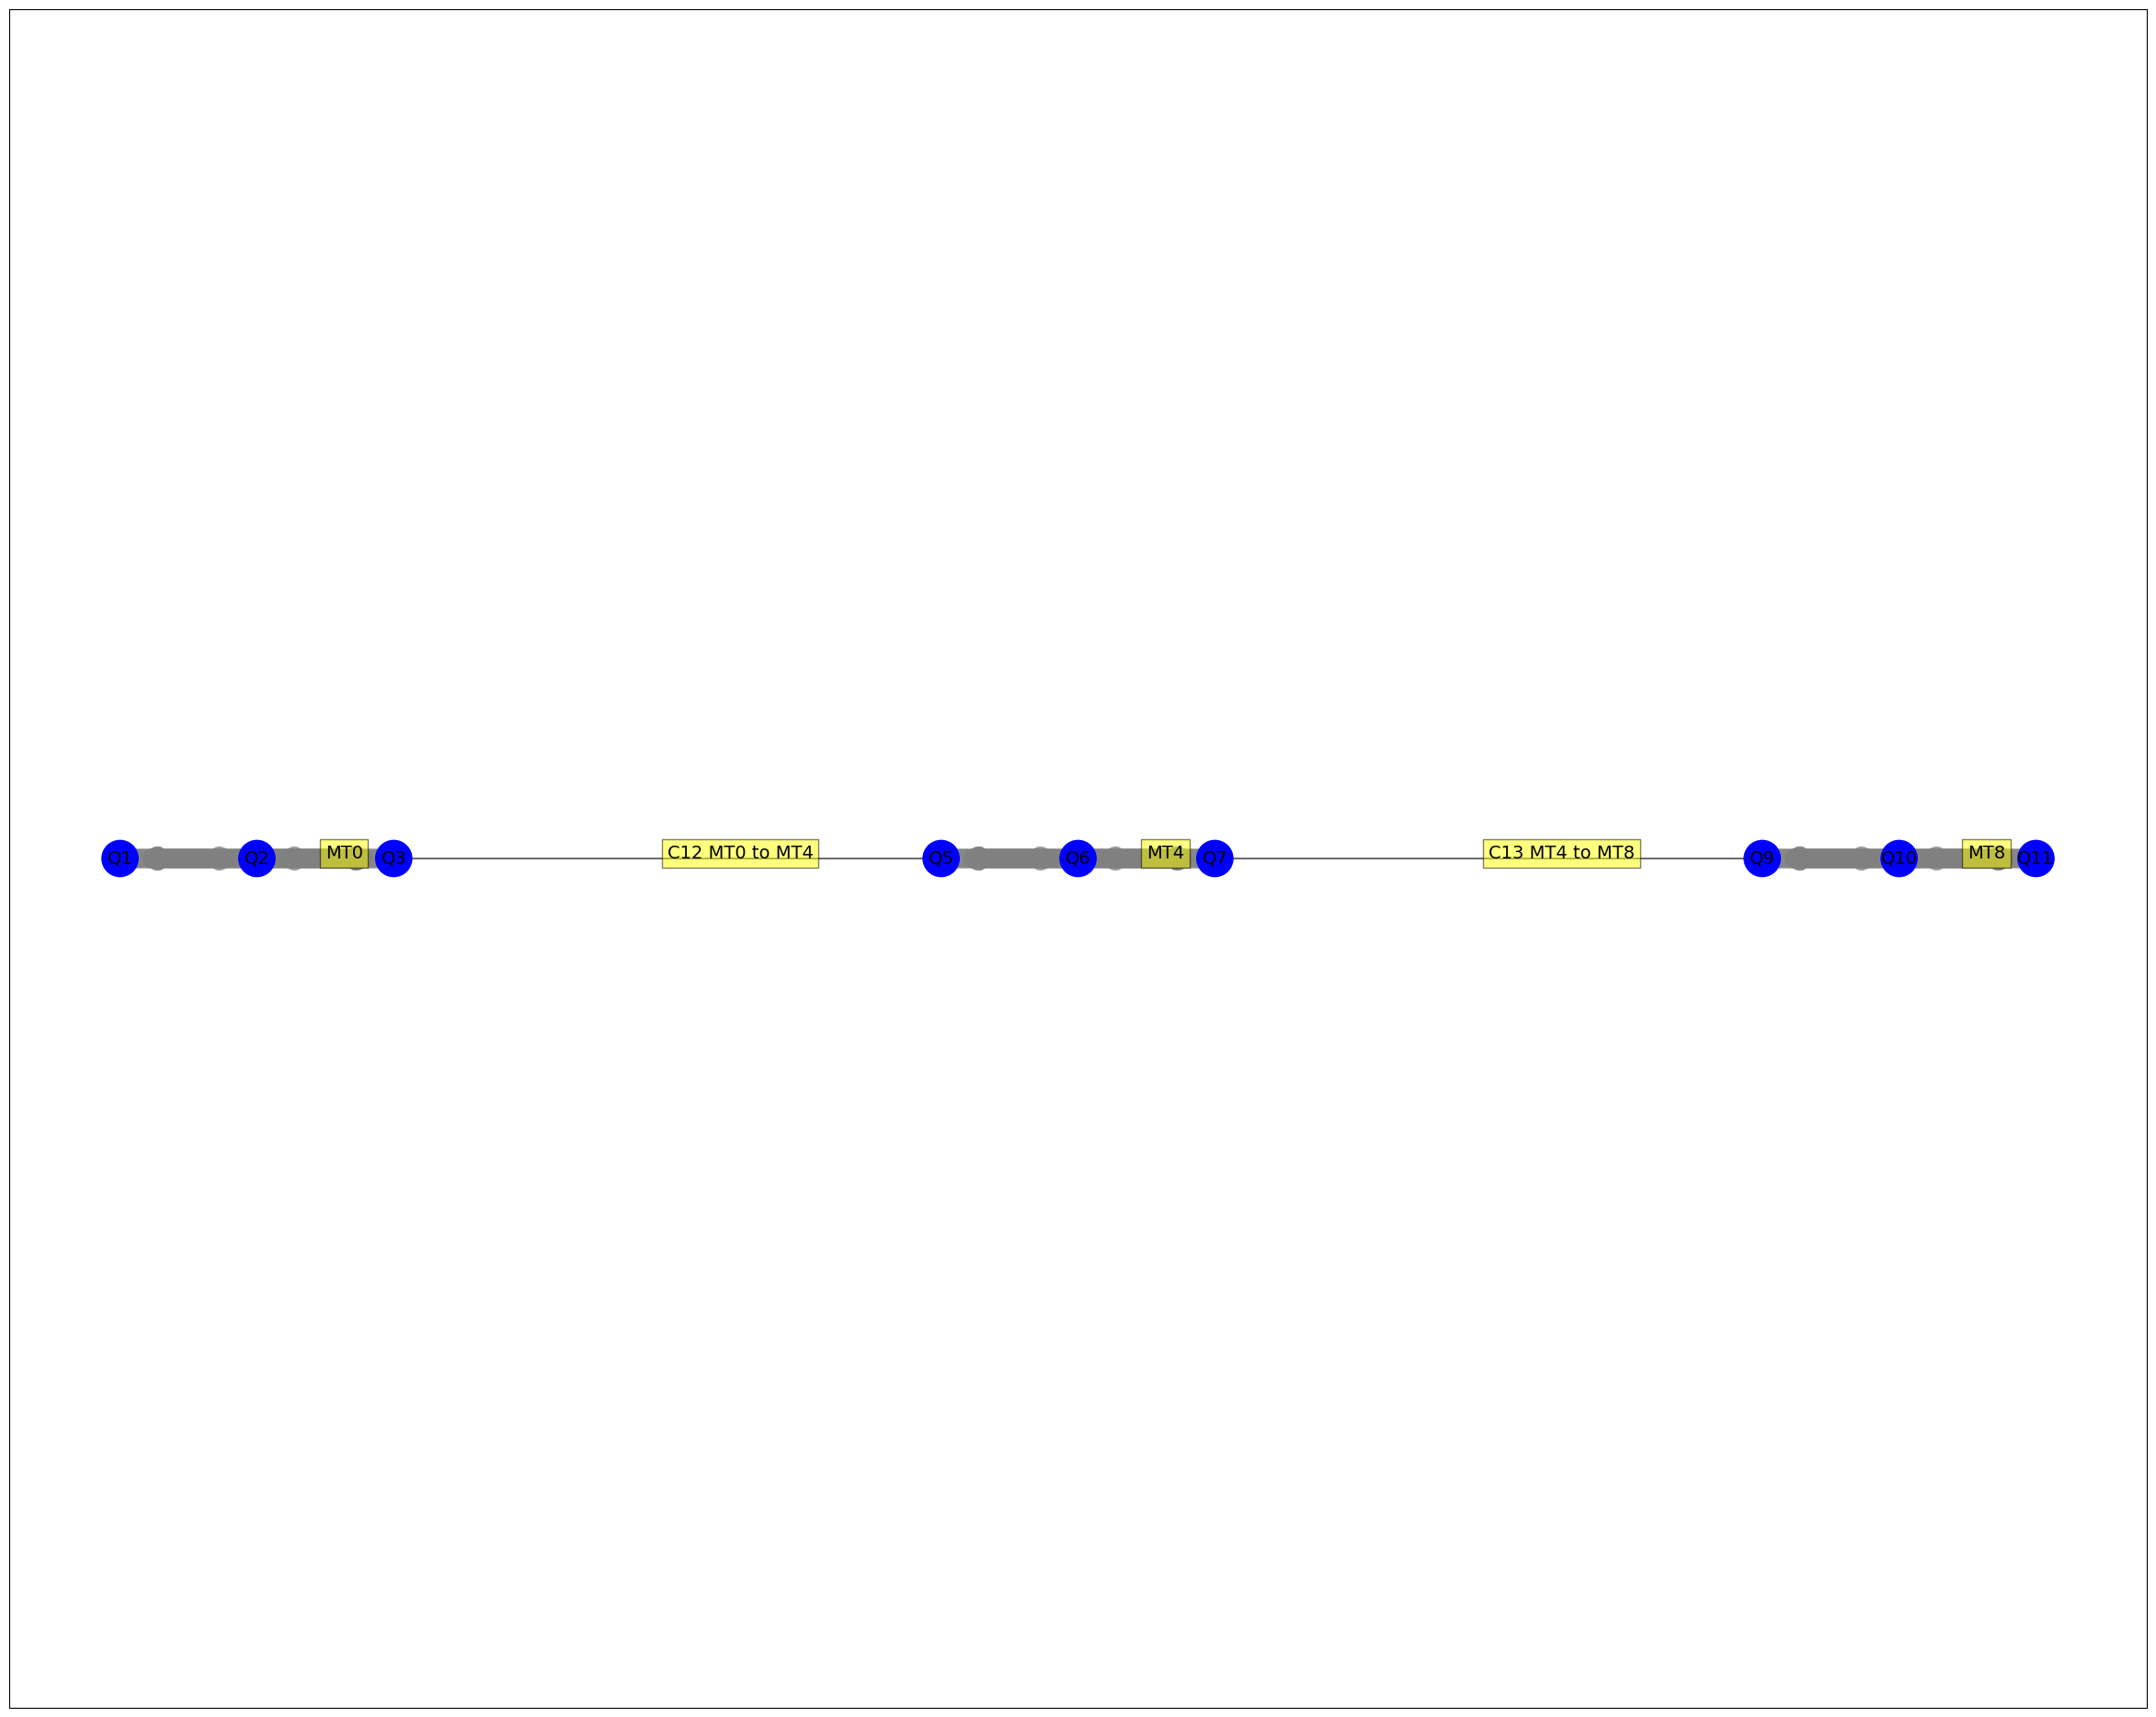

In [5]:
arch = QCCDArch()

ionspacing = 5
trapspacing = 30
cool = 'red'
qubit = 'blue'
traps = []

for i in range(3):
    ions = [QubitIon(qubit, 'Q'), QubitIon(qubit, 'Q'), QubitIon(qubit, 'Q')]
    trap = arch.addManipulationTrap(x=i * trapspacing, y=0, ions=ions, color='grey', spacing=ionspacing, isHorizontal=True)
    traps.append(trap)

for t1,t2 in zip(traps[:-1], traps[1:]):
    arch.addEdge(t1,t2)

arch.refreshGraph()
fig,ax = plt.subplots()
arch.display(fig, ax, showLabels=True)

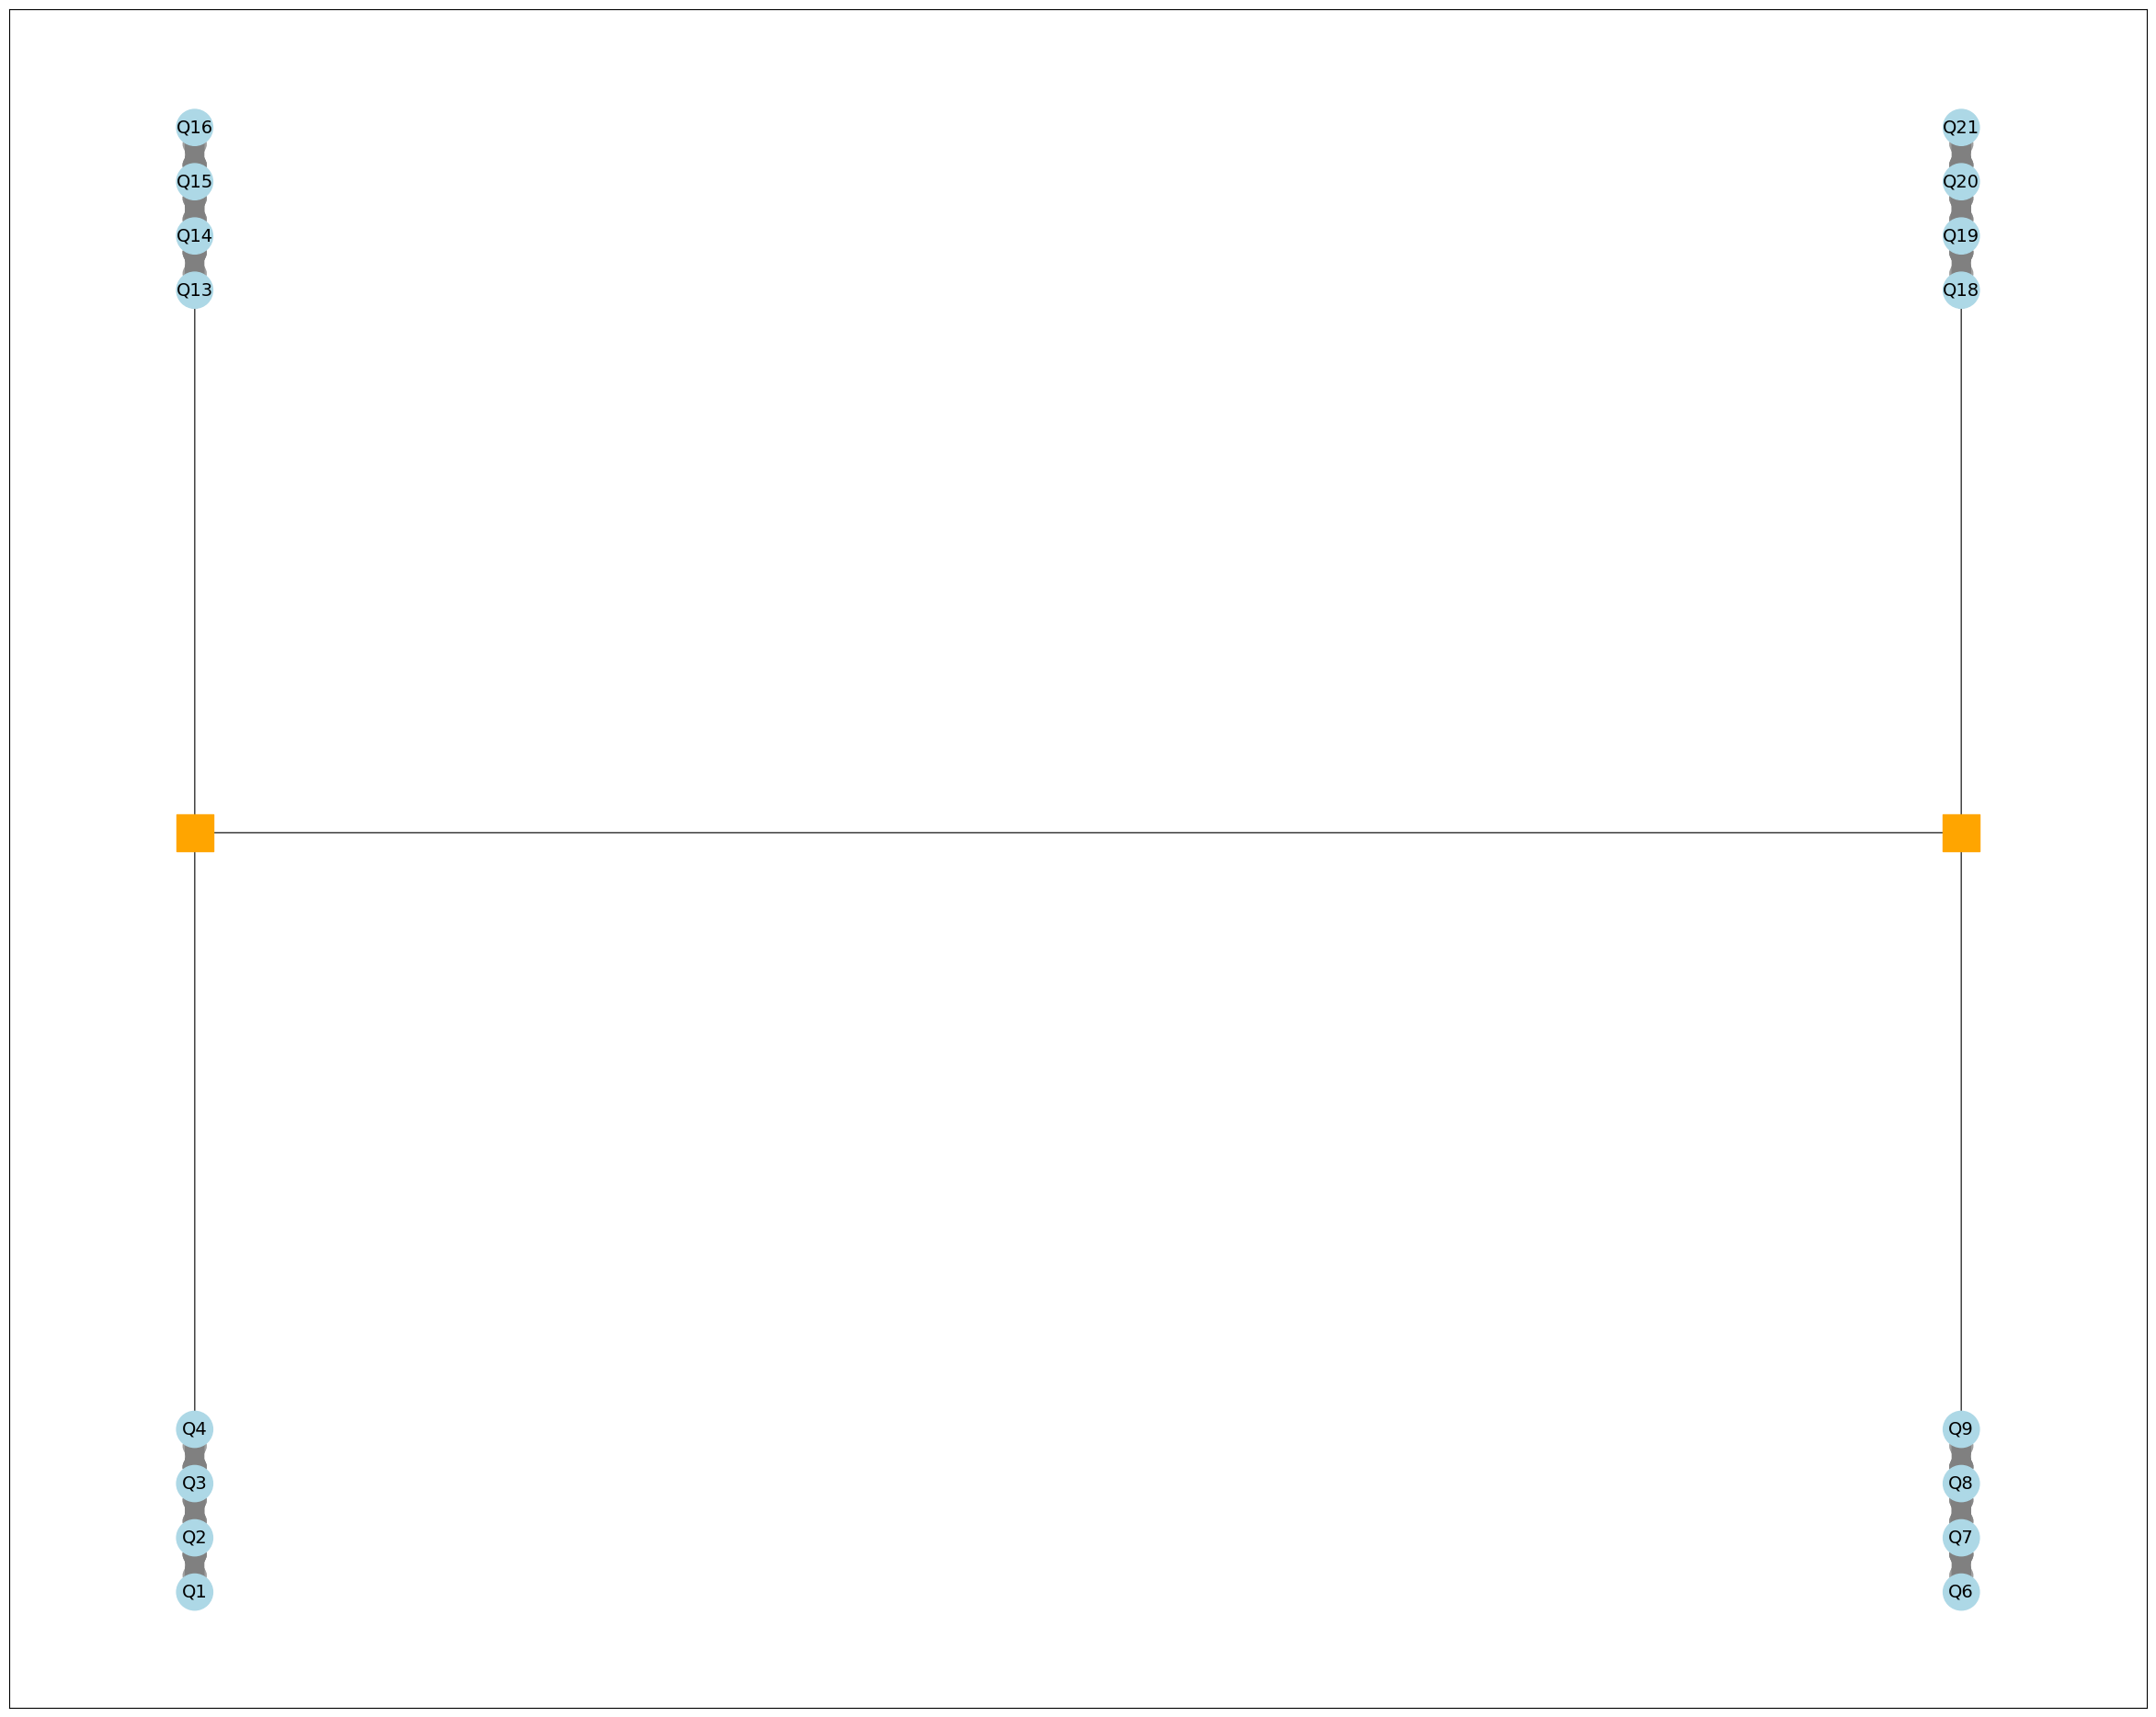

In [6]:
arch = QCCDArch()

ionspacing = 1
trapspacing = 6
qubit_colour = 'red'
qubit_colour = 'lightblue'
junction_colour = 'orange'
traps = []

ManipulationTrap.DEFAULT_SPACING = trapspacing
arch.SIZING = 0.5
ions11 = [QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q'), QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q')]
trap11 = arch.addManipulationTrap(x=0, y=0, ions=ions11, color='grey', spacing=ionspacing, isHorizontal=False)

ions12 = [QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q'), QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q')]
trap12 = arch.addManipulationTrap(x=trapspacing, y=0, ions=ions12, color='grey', spacing=ionspacing, isHorizontal=False)

junctionL = arch.addJunction(x=0, y=trapspacing, color=junction_colour)
junctionR = arch.addJunction(x=trapspacing, y=trapspacing, color=junction_colour)

ions21 = [QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q'), QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q')]
trap21 = arch.addManipulationTrap(x=0, y=2*trapspacing, ions=ions21, color='grey', spacing=ionspacing, isHorizontal=False)

ions22 = [QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q'), QubitIon(qubit_colour, 'Q'), CoolingIon(qubit_colour, 'Q')]
trap22 = arch.addManipulationTrap(x=trapspacing, y=2*trapspacing, ions=ions22, color='grey', spacing=ionspacing, isHorizontal=False)

crossing11 = arch.addEdge(trap11, junctionL)
arch.addEdge(trap12, junctionR)
crossing21 = arch.addEdge(trap21, junctionL)
arch.addEdge(trap22, junctionR)
arch.addEdge(junctionL, junctionR)

arch.refreshGraph()
# Display architecture
fig, ax = plt.subplots()
# Display architecture
arch.display(fig,ax, showLabels=False)

In [7]:
from src.compiler.qccd_parallelisation import *

ops = (
    Split.physicalOperation(trap11, crossing11), 
    Move.physicalOperation(crossing11),
    JunctionCrossing.physicalOperation(junctionL, crossing11),
    JunctionCrossing.physicalOperation(junctionL, crossing21),
    Move.physicalOperation(crossing21),
    Merge.physicalOperation(trap21, crossing21),
    GateSwap.physicalOperation(trap=trap21, ion1=ions21[0], ion2=ions21[2]),
    TwoQubitMSGate.physicalOperation(ion1=ions22[0], ion2=ions22[2],trap=trap22),
    OneQubitGate.physicalOperation(ion=ions12[0], trap=trap12),
    Measurement.physicalOperation(ion=ions12[0], trap=trap12),
    QubitReset.physicalOperation(ion=ions12[0],trap=trap12))
parallelOps = paralleliseOperationsSimple(ops)

print(parallelOps)

[<src.utils.qccd_operations.ParallelOperation object at 0x0000016F06007CB0>, <src.utils.qccd_operations.ParallelOperation object at 0x0000016F081FEC10>, <src.utils.qccd_operations.ParallelOperation object at 0x0000016F081FED50>, <src.utils.qccd_operations.ParallelOperation object at 0x0000016F0492B950>, <src.utils.qccd_operations.ParallelOperation object at 0x0000016F0492AEA0>, <src.utils.qccd_operations.ParallelOperation object at 0x0000016F0600D6D0>, <src.utils.qccd_operations.ParallelOperation object at 0x0000016F05FC1F20>]


QUBIT_RESET[19]
QUBIT_RESET[10]
QUBIT_RESET[23]
QUBIT_RESET[12]
QUBIT_RESET[30]
QUBIT_RESET[42]
QUBIT_RESET[33]
QUBIT_RESET[36]
QUBIT_RESET[52]
QUBIT_RESET[55]
QUBIT_RESET[45]
QUBIT_RESET[46]
QUBIT_RESET[62]
QUBIT_RESET[63]
QUBIT_RESET[66]
QUBIT_RESET[67]
QUBIT_RESET[17]
QUBIT_RESET[21]
QUBIT_RESET[18]
QUBIT_RESET[9]
QUBIT_RESET[22]
QUBIT_RESET[28]
QUBIT_RESET[29]
QUBIT_RESET[41]
QUBIT_RESET[32]
QUBIT_RESET[35]
QUBIT_RESET[51]
QUBIT_RESET[54]
QUBIT_RESET[44]
QUBIT_RESET[61]
QUBIT_RESET[65]
RY[17]
RX[17]
RY[21]
RX[21]
RY[9]
RX[9]
RY[29]
RX[29]
RY[32]
RX[32]
RY[54]
RX[54]
RY[61]
RX[61]
RY[65]
RX[65]
RY[17]
RX[17]
RX[10]
TWO_QUBIT_MS_GATE[17, 10]
RY[17]
RY[29]
RX[29]
RX[55]
TWO_QUBIT_MS_GATE[29, 55]
RY[29]
RY[9]
RX[9]
RX[33]
TWO_QUBIT_MS_GATE[9, 33]
RY[9]
RY[54]
RX[54]
RX[66]
TWO_QUBIT_MS_GATE[54, 66]
RY[54]
RY[21]
RX[21]
RX[12]
TWO_QUBIT_MS_GATE[21, 12]
RY[21]
RY[32]
RX[32]
RX[46]
TWO_QUBIT_MS_GATE[32, 46]
RY[32]
RY[52]
RX[52]
RX[28]
TWO_QUBIT_MS_GATE[52, 28]
RY[52]
RY[42]
RX[42]
RX[18]


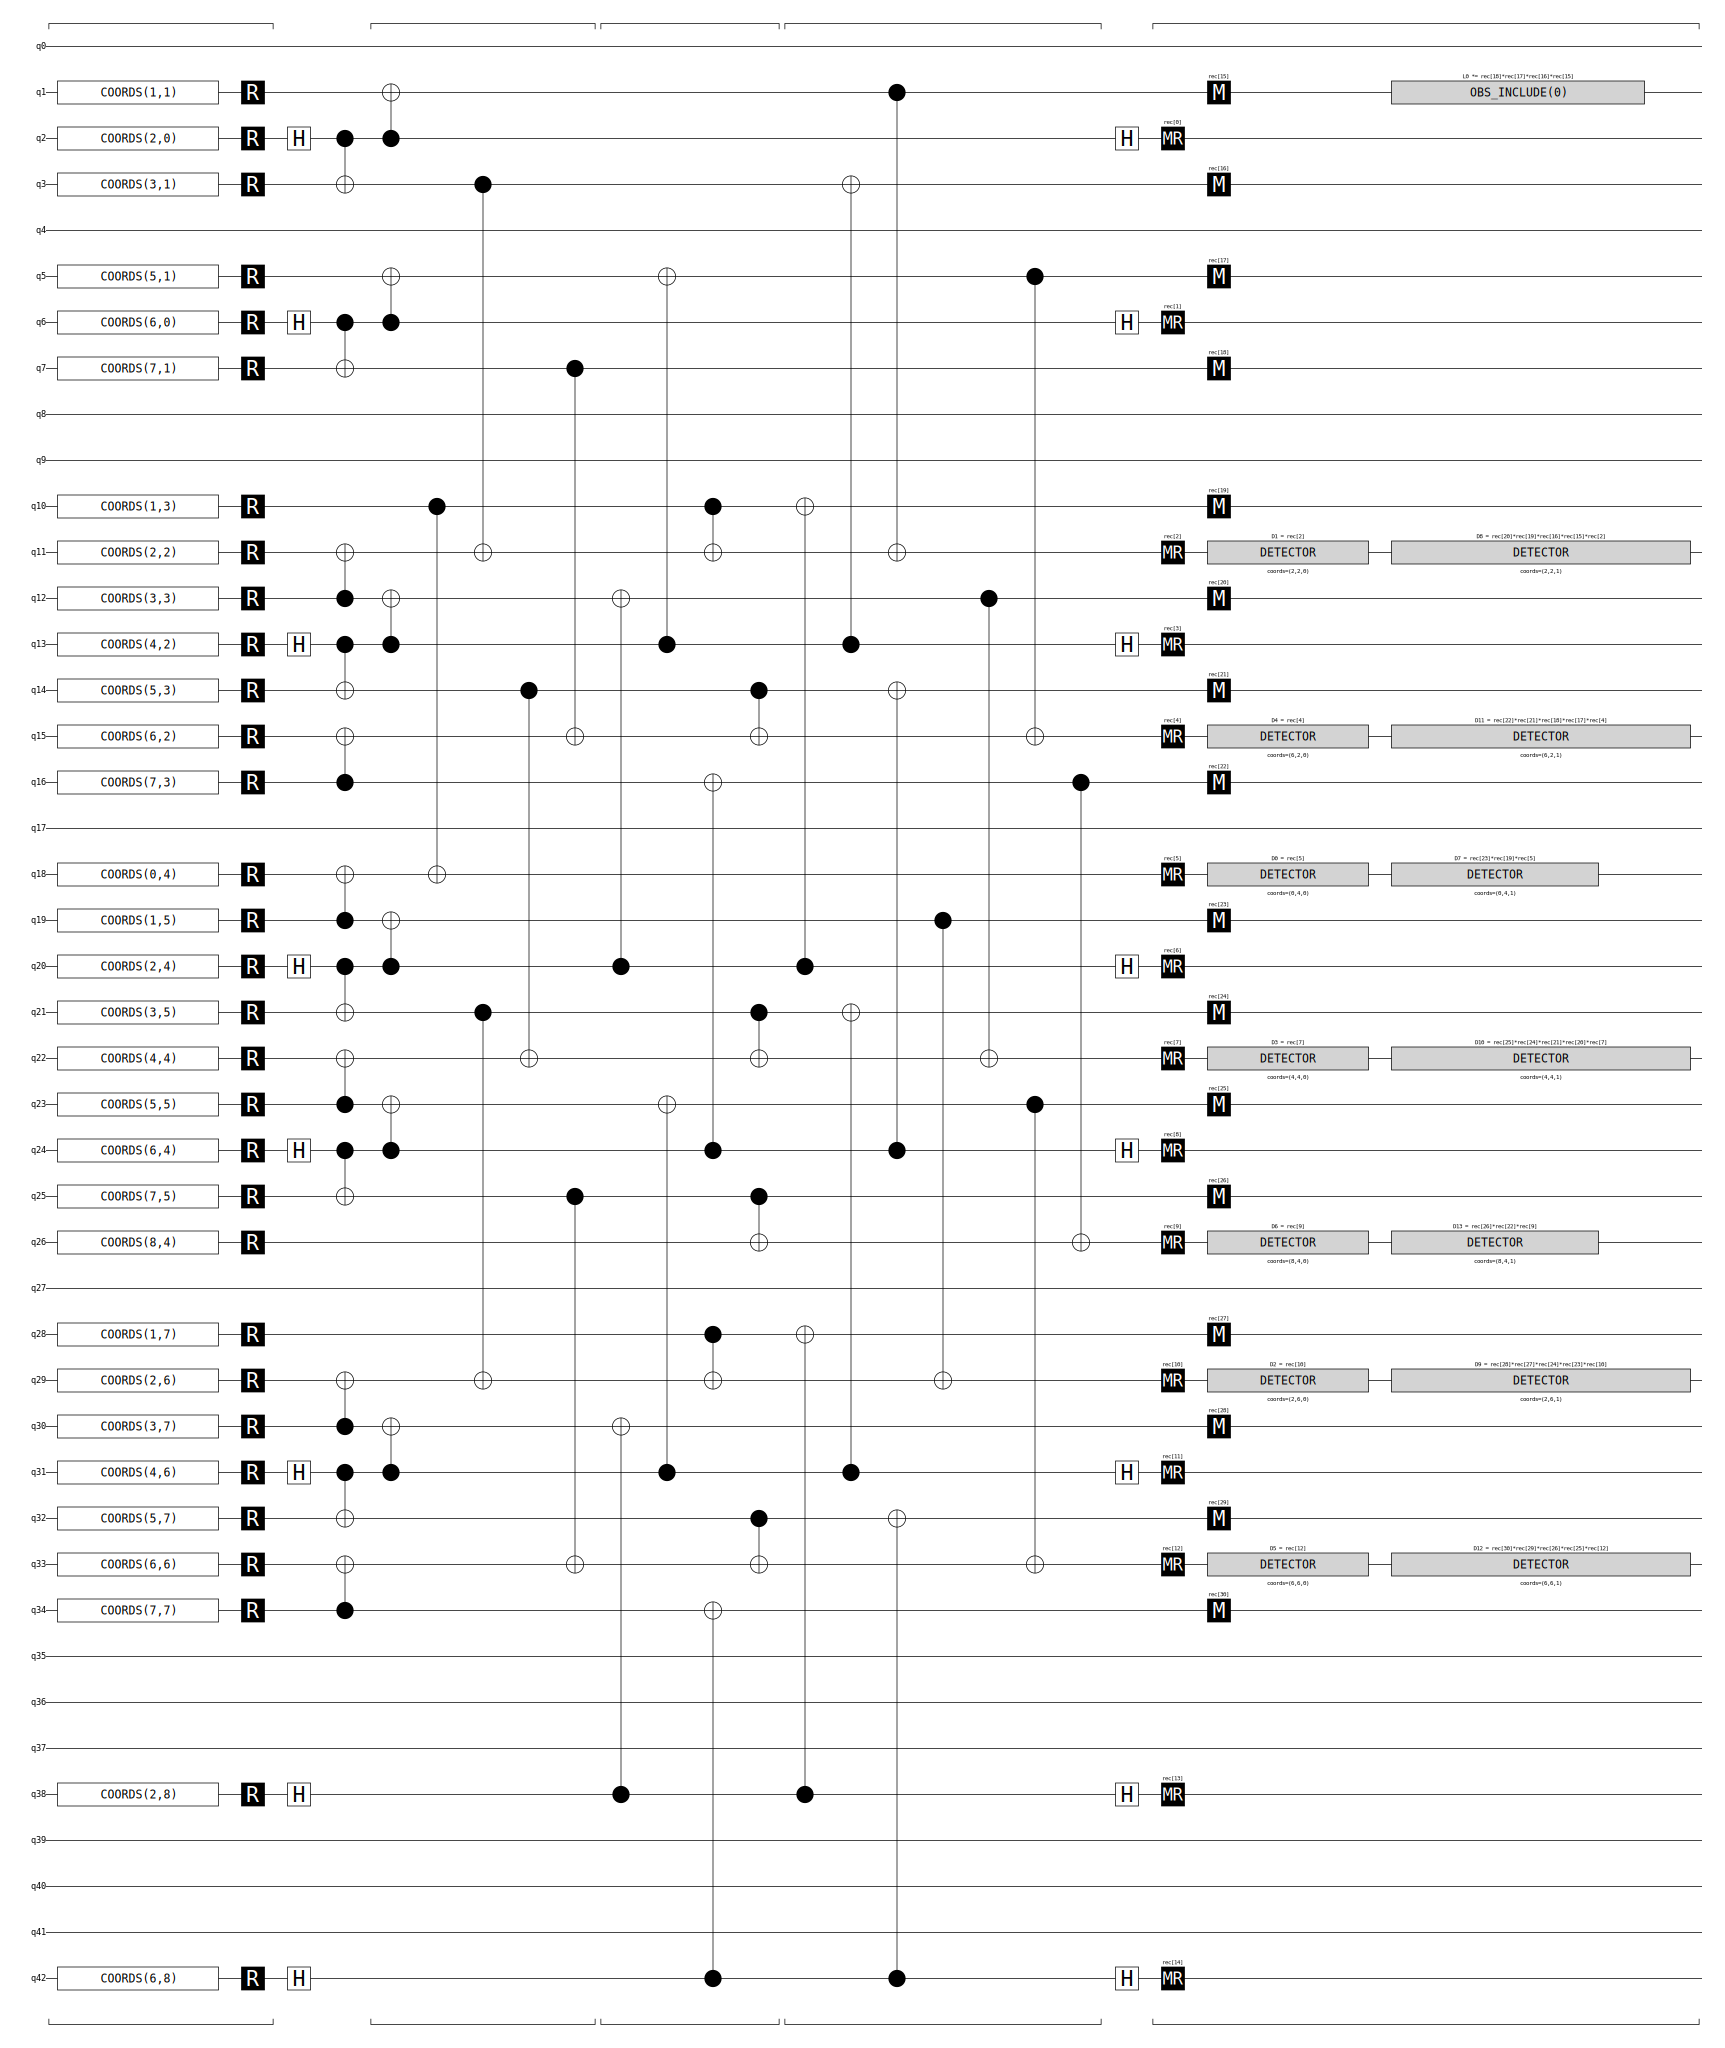

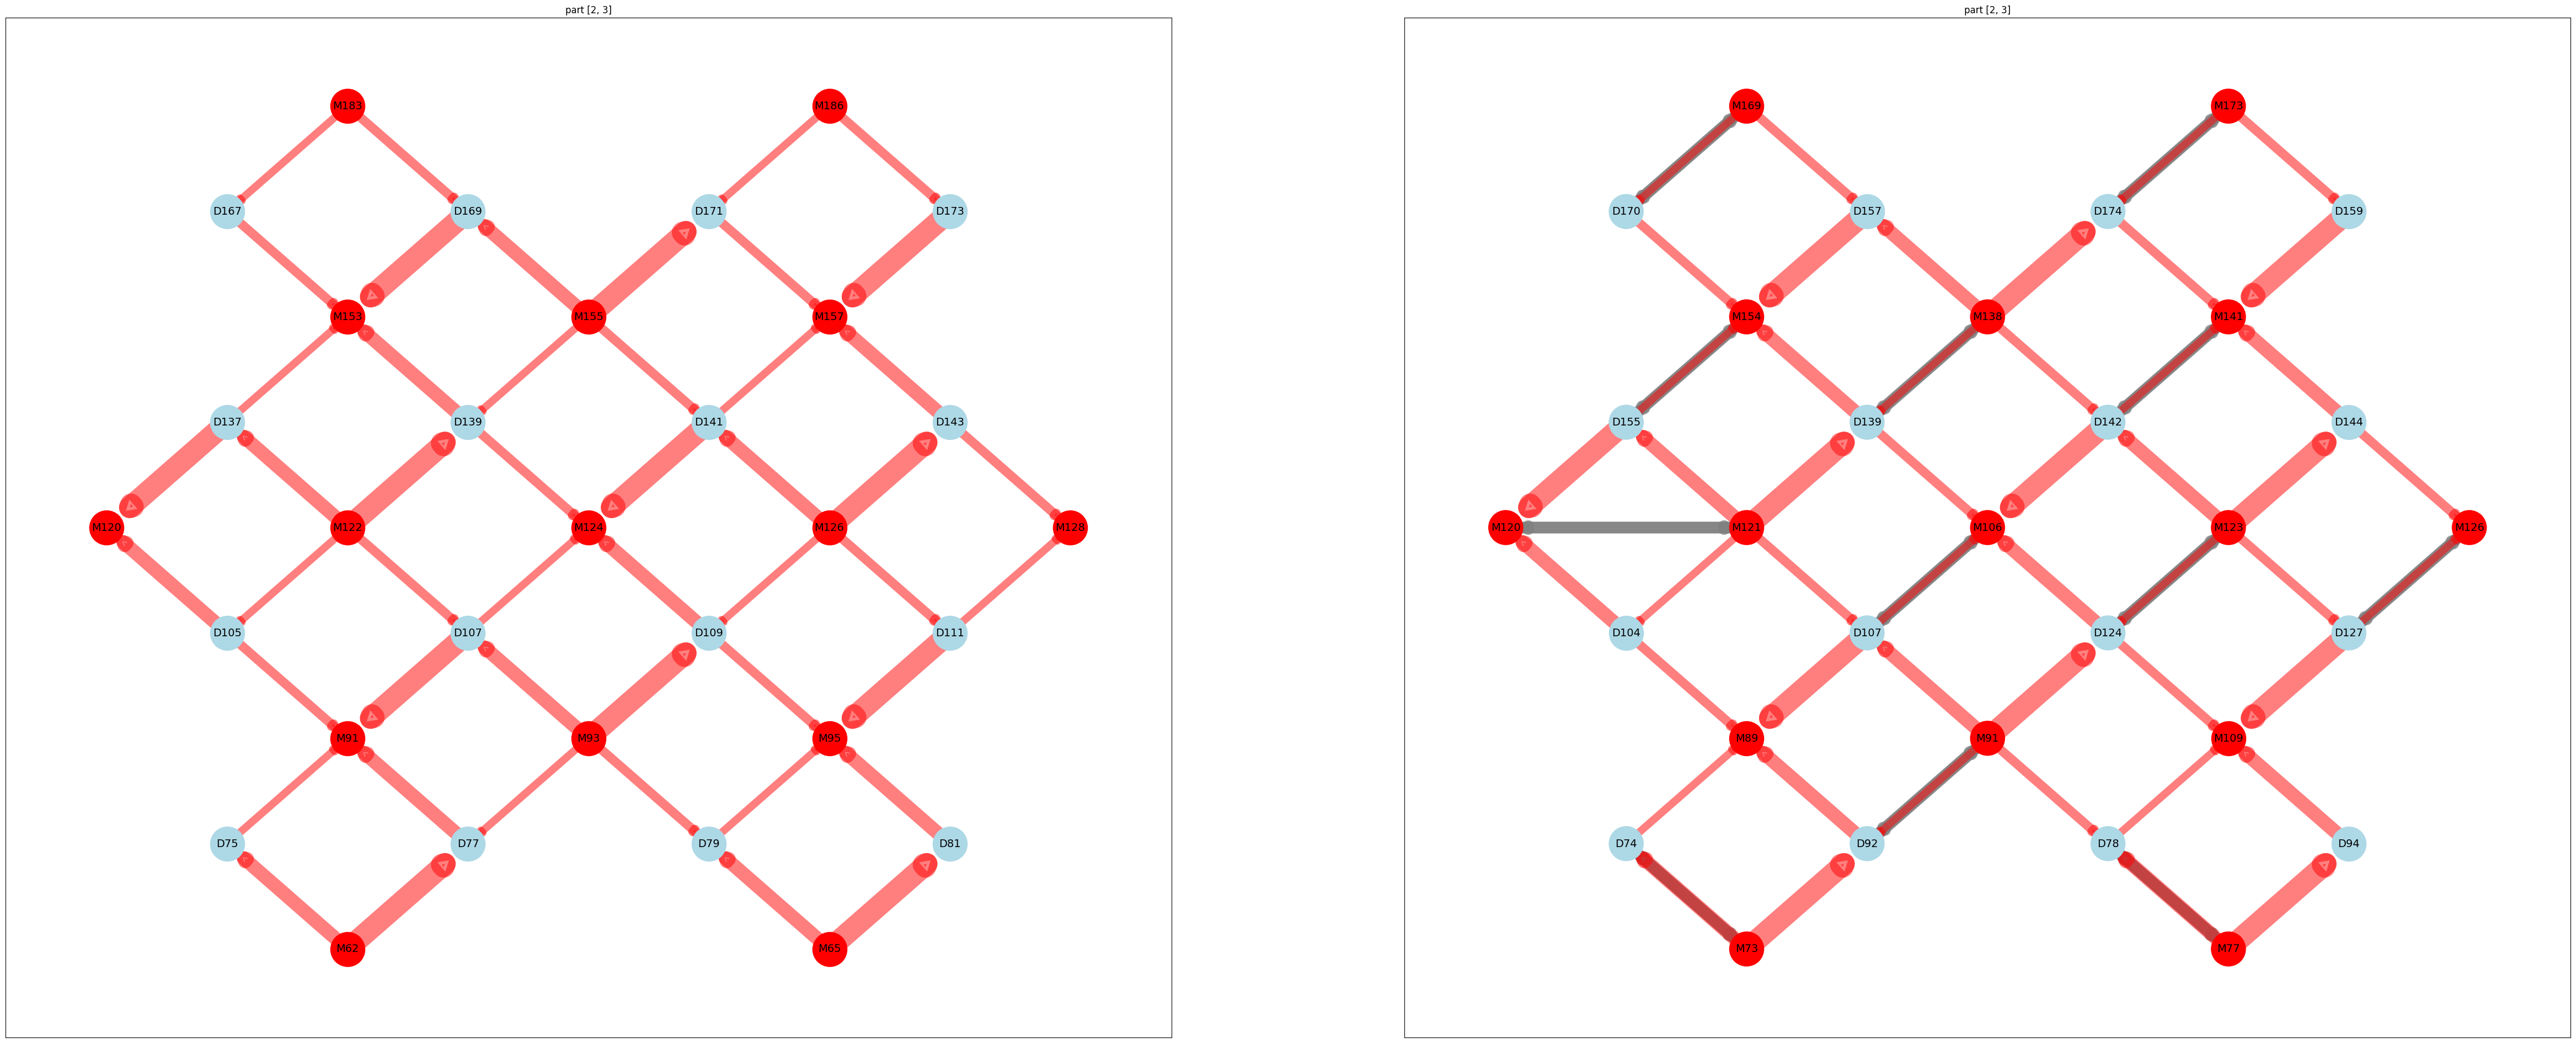

In [10]:
from src.simulator.qccd_circuit import *

noise = 1e-3
d=4
    
circuit = QCCDCircuit.generated(
    "surface_code:rotated_memory_z",
    rounds=1,
    distance=d,
    after_clifford_depolarization=noise,
    after_reset_flip_probability=noise,
    before_measure_flip_probability=noise,
    before_round_data_depolarization=noise,
)


rows = 4
cols = 4
capacity = 4

arch, (instructions,_) = circuit.processCircuitAugmentedGrid(rows=rows, cols=cols, trapCapacity=capacity)

for i in instructions:
    print(i.label+str([ion.idx for ion in i.ions]))

_capacities = [2,3]
rows = 10
cols = 10

label='part'
fig, axs = plt.subplots(1, len(_capacities))
for ax, capacity in zip(axs, _capacities):
    arch1, (instructions,_) = circuit.processCircuitAugmentedGrid(rows=rows, cols=cols, trapCapacity=capacity)
    arch1.ION_SIZE = 2000

    for idx, (ion, pos) in circuit._ionMapping.items():
        ion.set(ion.idx, pos[0], pos[1])

    arch1.refreshGraph()
    edgesDups = []
    edgesPos = []
    ionsInvolved = set()
    score = 0
    for op in instructions:
        if not isinstance(op, TwoQubitMSGate):
            continue
        if not ionsInvolved.isdisjoint(op.ions):
            score+=1
            ionsInvolved=set()
        edgesDups.append((op.ions, score))
        edgesPos.append((op.ionsActedIdxs, score))
        ionsInvolved=ionsInvolved.union(op.ions)
    scores = [score for ((ion1,ion2), score) in edgesDups]
    color_from_score = {s: (5+i*i)*2 for i, s in enumerate( sorted(list(set(scores)), reverse=True))}
    arch1._manipulationTraps.append(([(ion1.idx, ion2.idx) for ((ion1,ion2), score) in edgesDups], [color_from_score[score] for ((ion1,ion2), score) in edgesDups]))
    arch1.display(fig, ax, showLabels=False, showEdges=False, show_junction=False)
    ax.set_title(f"{label} {_capacities}")

print(circuit.circuitString())
circuit.without_noise().diagram('timeline-svg')

['QUBIT_COORDS(0, 0) 0', 'QUBIT_COORDS(1, 0) 1', 'QUBIT_COORDS(2, 0) 2', 'QUBIT_COORDS(3, 0) 3', 'QUBIT_COORDS(0.5, 1) 4', 'QUBIT_COORDS(1.5, 1) 5', 'QUBIT_COORDS(2.5, 1) 6', 'QUBIT_COORDS(1, 2) 7', 'QUBIT_COORDS(2, 2) 8', 'QUBIT_COORDS(1.5, 3) 9', 'R 0', 'R 1', 'R 2', 'R 3', 'R 4', 'R 5', 'R 6', 'R 7', 'R 8', 'R 9', 'S 0 1 3 5 6 7 9 0 1 3 5 6 7 9 0 1 3 5 6 7 9', 'H 0', 'H 1', 'H 3', 'H 5', 'H 6', 'H 7', 'H 9', 'CNOT 5 4', 'CNOT 3 2', 'BARRIER', 'CNOT 7 4', 'CNOT 6 2', 'BARRIER', 'CNOT 1 4', 'CNOT 6 8', 'BARRIER', 'CNOT 1 2', 'CNOT 7 8', 'BARRIER', 'CNOT 5 2', 'CNOT 9 8', 'BARRIER', 'CNOT 0 4', 'CNOT 5 8', 'BARRIER', 'M 2', 'M 4', 'M 8', 'R 2', 'R 4', 'R 8', 'S 0 1 3 5 6 7 9 0 1 3 5 6 7 9 0 1 3 5 6 7 9', 'H 0', 'H 1', 'H 3', 'H 5', 'H 6', 'H 7', 'H 9', 'CNOT 5 4', 'CNOT 3 2', 'BARRIER', 'CNOT 7 4', 'CNOT 6 2', 'BARRIER', 'CNOT 1 4', 'CNOT 6 8', 'BARRIER', 'CNOT 1 2', 'CNOT 7 8', 'BARRIER', 'CNOT 5 2', 'CNOT 9 8', 'BARRIER', 'CNOT 0 4', 'CNOT 5 8', 'BARRIER', 'M 2', 'M 4', 'M 8', 'R 2',

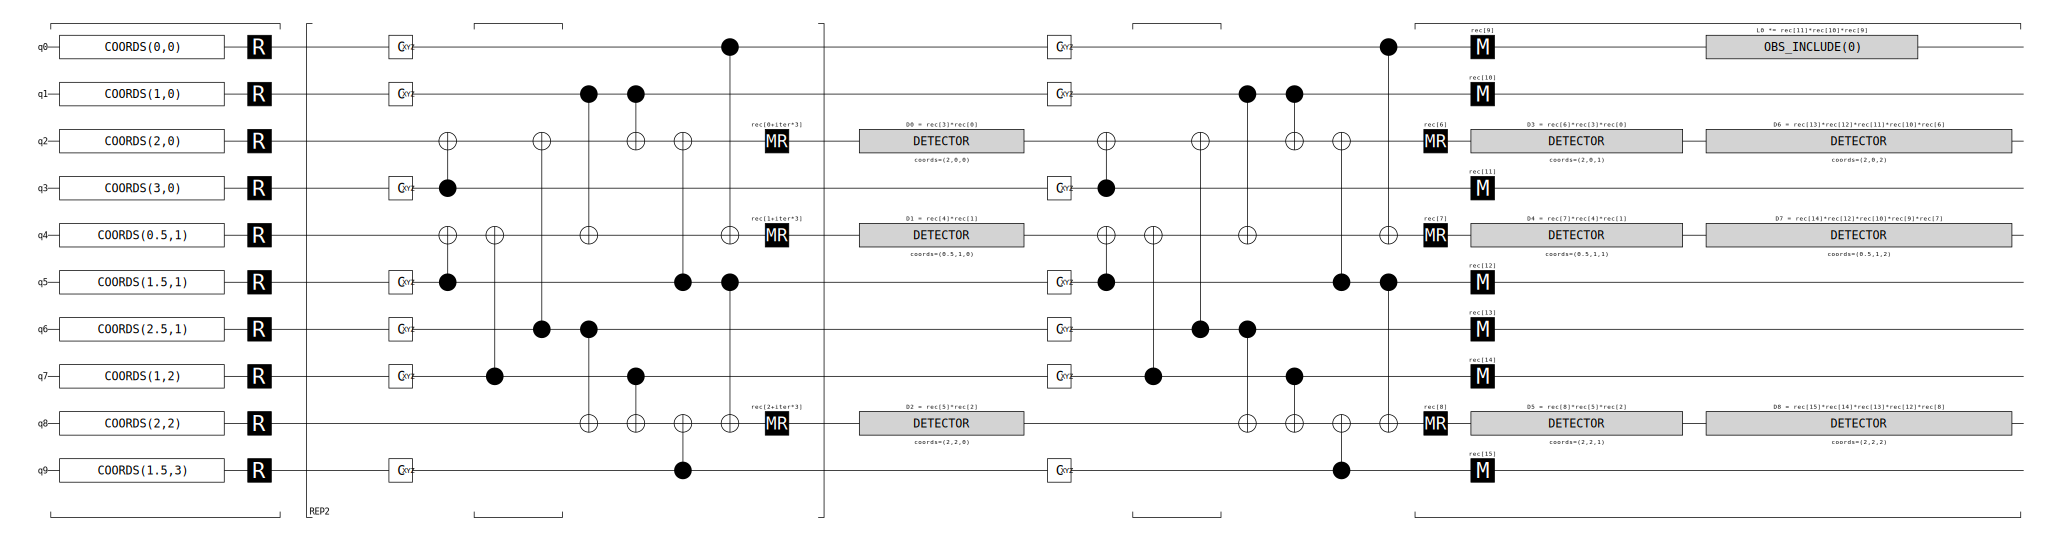

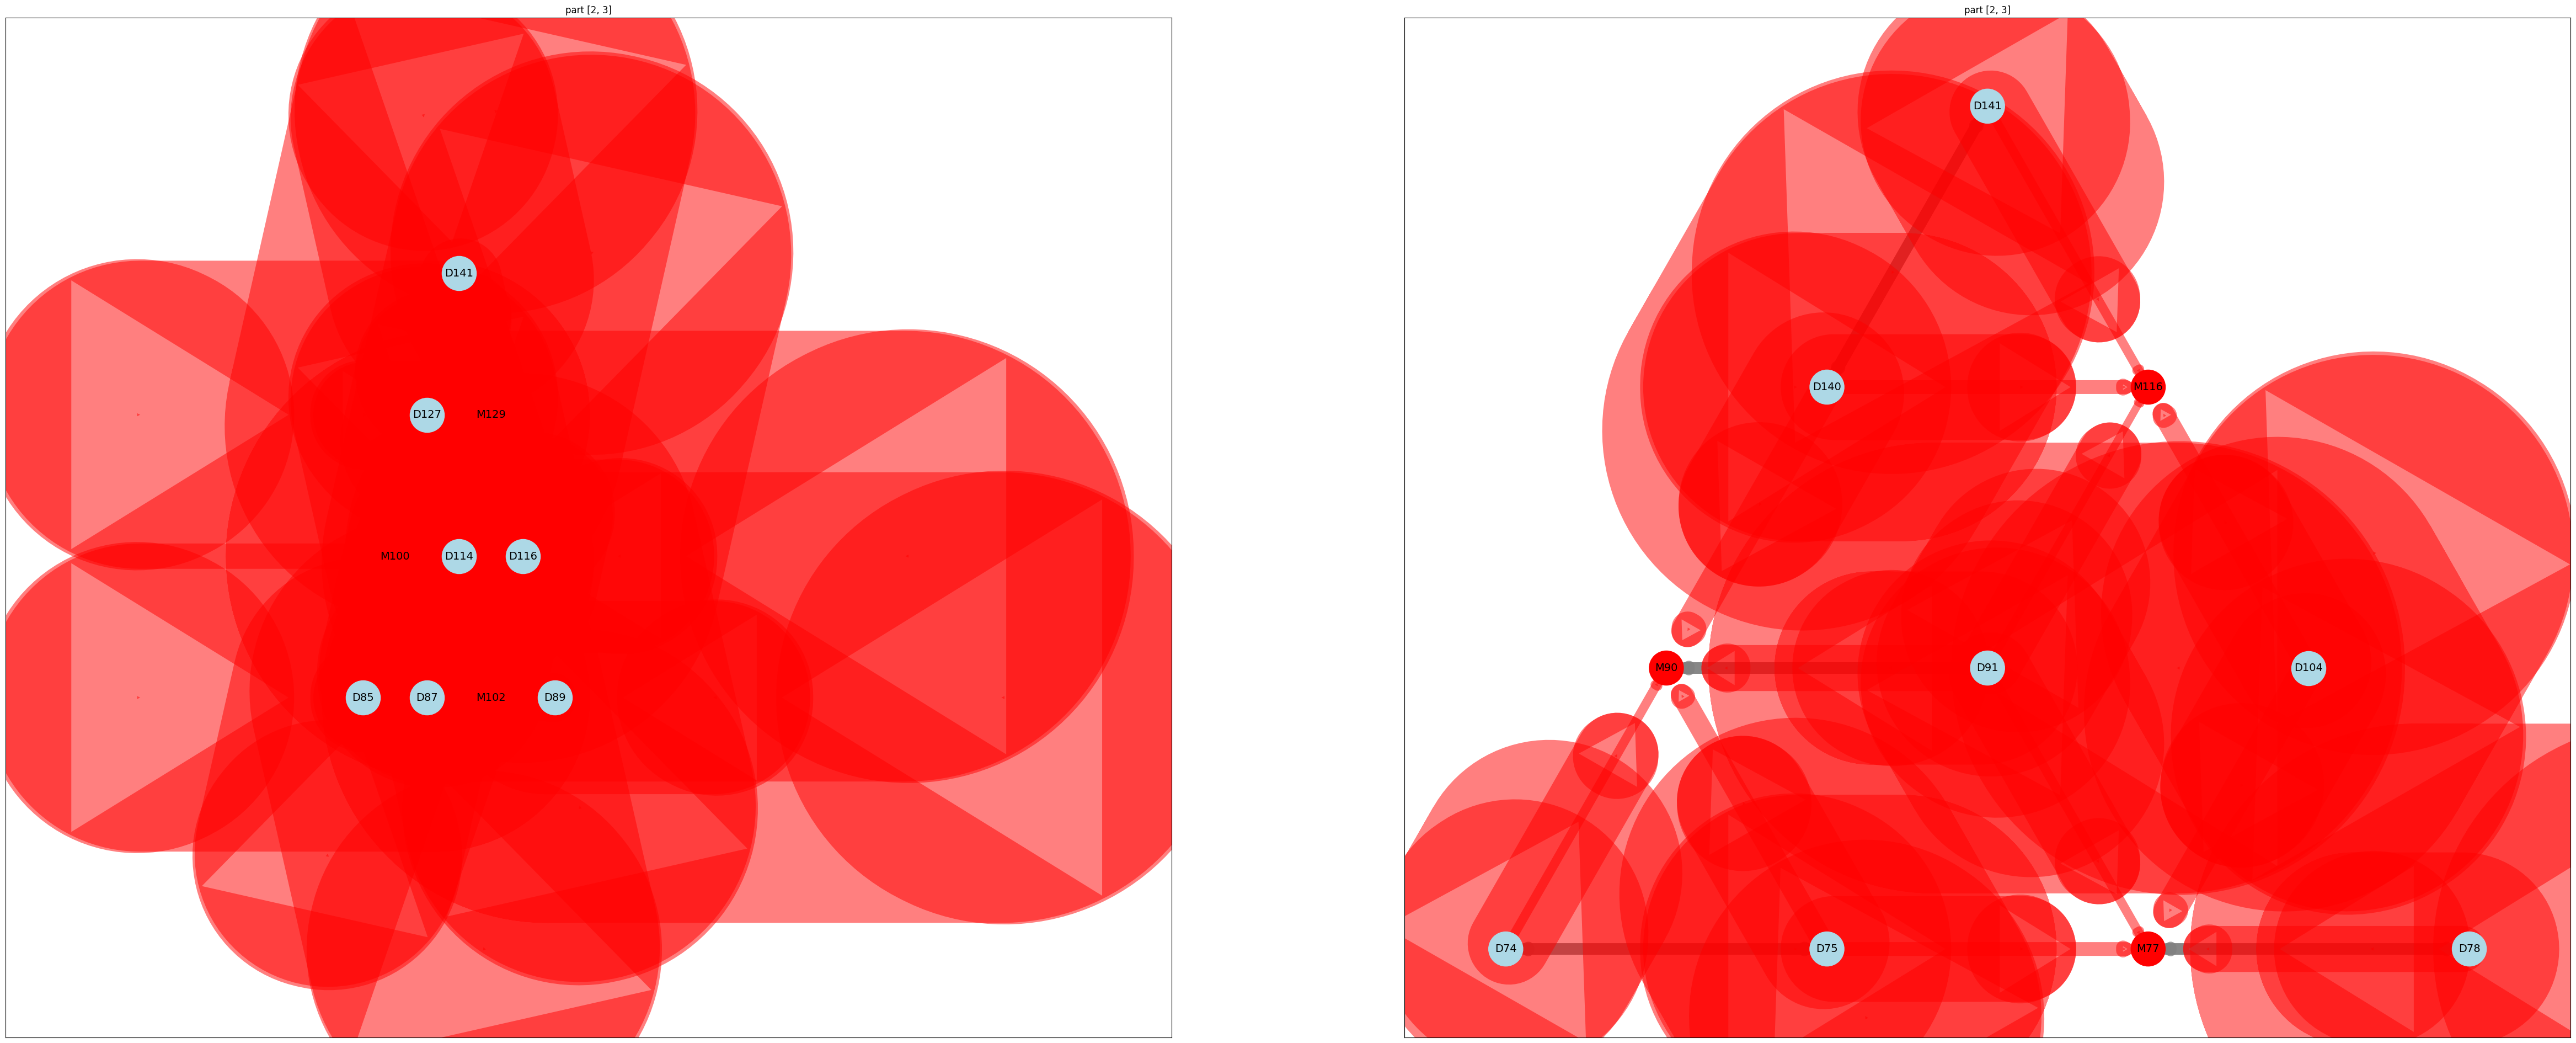

In [9]:
from src.simulator.qccd_circuit import *
noise = 1e-3
d=3
    
circuit = QCCDCircuit.generated(
    "color_code:memory_xyz",
    rounds=3,
    distance=d,
    after_clifford_depolarization=noise,
    after_reset_flip_probability=noise,
    before_measure_flip_probability=noise,
    before_round_data_depolarization=noise,
)


rows = 4
cols = 4
capacity = 4

print(circuit.circuitString())
arch, (instructions,_) = circuit.processCircuitAugmentedGrid(rows=rows, cols=cols, trapCapacity=capacity)

for i in instructions:
    print(i.label+str([ion.idx for ion in i.ions]))

_capacities = [2,3]
rows = 10
cols = 10

label='part'
fig, axs = plt.subplots(1, len(_capacities))
for ax, capacity in zip(axs, _capacities):
    arch1, (instructions,_) = circuit.processCircuitAugmentedGrid(rows=rows, cols=cols, trapCapacity=capacity)
    arch1.ION_SIZE = 2000

    for idx, (ion, pos) in circuit._ionMapping.items():
        ion.set(ion.idx, pos[0], pos[1])

    arch1.refreshGraph()
    edgesDups = []
    edgesPos = []
    ionsInvolved = set()
    score = 0
    for op in instructions:
        if not isinstance(op, TwoQubitMSGate):
            continue
        if not ionsInvolved.isdisjoint(op.ions):
            score+=1
            ionsInvolved=set()
        edgesDups.append((op.ions, score))
        edgesPos.append((op.ionsActedIdxs, score))
        ionsInvolved=ionsInvolved.union(op.ions)
    scores = [score for ((ion1,ion2), score) in edgesDups]
    color_from_score = {s: (5+i*i)*2 for i, s in enumerate( sorted(list(set(scores)), reverse=True))}
    arch1._manipulationTraps.append(([(ion1.idx, ion2.idx) for ((ion1,ion2), score) in edgesDups], [color_from_score[score] for ((ion1,ion2), score) in edgesDups]))
    arch1.display(fig, ax, showLabels=False, showEdges=False, show_junction=False)
    ax.set_title(f"{label} {_capacities}")


circuit.without_noise().diagram('timeline-svg')

In [36]:
li = ['0.5']
print(tuple(map(int, li)))

ValueError: invalid literal for int() with base 10: '0.5'